In [35]:
# import the necessary packages
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets
from nolearn.dbn import DBN
import cv2

# grab the MNIST dataset (if this is the first time you are running
# this script, this make take a minute -- the 55mb MNIST digit dataset
# will be downloaded)
print ("[X] downloading data...")
dataset = datasets.fetch_openml("mnist_784", version=1)

# scale the data to the range [0, 1] and then construct the training
# and testing splits
(trainX, testX, trainY, testY) = train_test_split(dataset.data / 255.0, dataset.target.astype("int0"), test_size = 0.33)

# train the Deep Belief Network with 784 input units (the flattened,
# 28x28 grayscale image), 300 hidden units, 10 output units (one for
# each possible output classification, which are the digits 1-10)
dbn = DBN(
    [trainX.shape[1], 300, 10],
    learn_rates = 0.3,
    learn_rate_decays = 0.9,
    epochs = 10,
    verbose = 1)
dbn.fit(trainX, trainY)

# compute the predictions for the test data and show a classification
# report
preds = dbn.predict(testX)
print classification_report(testY, preds)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# randomly select a few of the test instances
for i in np.random.choice(np.arange(0, len(testY)), size = (10,)):
        # classify the digit
        pred = dbn.predict(np.atleast_2d(testX[i]))
 
        # reshape the feature vector to be a 28x28 pixel image, then change
        # the data type to be an unsigned 8-bit integer
        image = (testX[i] * 255).reshape((28, 28)).astype("uint8")
 
        # show the image and prediction
        print "Actual digit is {0}, predicted {1}".format(testY[i], pred[0])
        cv2.imshow("Digit", image)
        cv2.waitKey(0)
    
$ python dbn.py

In [ ]:
$ python dbn.py

ModuleNotFoundError: No module named 'mdptoolbox'

GaussianNB(priors=None)
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.94      0.94      0.94        50
          2       0.94      0.94      0.94        50

avg / total       0.96      0.96      0.96       150

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


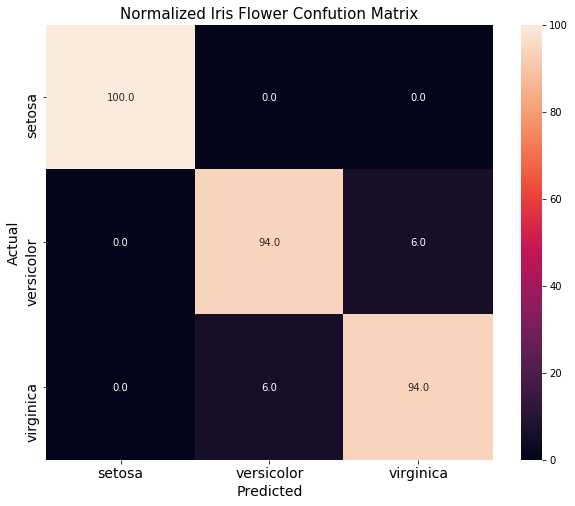

In [14]:
# Gaussian Naive Bayes
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
# load the iris datasets
dataset = datasets.load_iris()
# fit a Naive Bayes model to the data
model = GaussianNB()

model.fit(dataset.data, dataset.target)
print(model)
# make predictions
expected = dataset.target
predicted = model.predict(dataset.data)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

from sklearn.metrics import confusion_matrix
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
# Allow plots in Notebook
%matplotlib inline

conf_mat = confusion_matrix(expected, predicted)
conf_sum = np.sum(conf_mat, axis=1, keepdims=True)
cm_perc = conf_mat / conf_sum.astype(float) * 100
fig, ax = plt.subplots(figsize=(10,8))

sns.heatmap(cm_perc, annot=True, fmt='.1f',
            xticklabels=dataset['target_names'], yticklabels=dataset['target_names'])
plt.title('Normalized Iris Flower Confution Matrix', fontsize = 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Actual', fontsize = 14)
plt.xlabel('Predicted', fontsize = 14)
plt.show()

In [11]:
dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

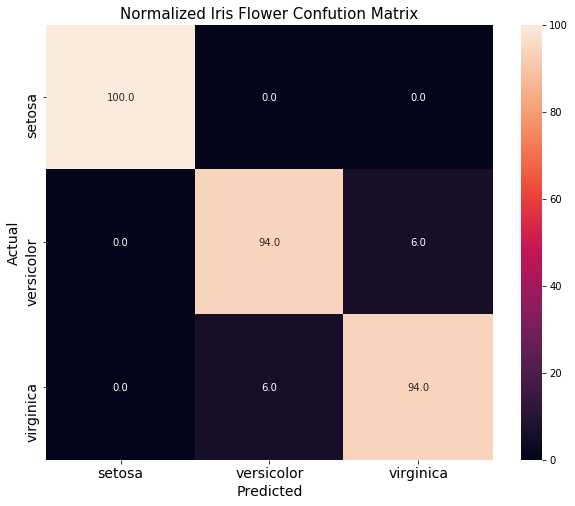

In [13]:
from sklearn.metrics import confusion_matrix
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
# Allow plots in Notebook
%matplotlib inline

conf_mat = confusion_matrix(expected, predicted)
conf_sum = np.sum(conf_mat, axis=1, keepdims=True)
cm_perc = conf_mat / conf_sum.astype(float) * 100
fig, ax = plt.subplots(figsize=(10,8))

sns.heatmap(cm_perc, annot=True, fmt='.1f',
            xticklabels=dataset['target_names'], yticklabels=dataset['target_names'])
plt.title('Normalized Iris Flower Confution Matrix', fontsize = 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Actual', fontsize = 14)
plt.xlabel('Predicted', fontsize = 14)
plt.show()